# Notebook utilizado para a exemplificar o uso de uma árvore de decisão para a classificação de texto

O problema abordado neste notebook é tentar classificar se uma disciplina é ou não da área de Computação/Sistemas de Informação com base em seu nome.

In [ ]:
### !pip install --upgrade scikit-learn==0.20.3

# Carregamento de bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Árvores de Decisão
from sklearn.model_selection import train_test_split # Função para separação do conjunto de dados em treinamento e teste
from sklearn import metrics # Métricas para avaliação da classificação
from sklearn.feature_extraction.text import CountVectorizer # Função para transformar os textos em representação com contagem de n-gramas
import nltk
nltk.download('stopwords') # Contém stop words em diversos idiomas

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from unicodedata import normalize
from nltk.corpus import stopwords

dados = pd.read_csv('http://www.each.usp.br/digiampietri/ACH2197/dados/DisciplinasSI.csv', sep='\t', decimal = '.', encoding = 'UTF-8')
texto = dados['Nome']
rotulos = dados['Classe']

# exclusao dos acentos das stopwords, por o texto será tratado sem acentos
minhaStopList = [normalize('NFKD', n).encode('ASCII', 'ignore').decode('ASCII') for n in stopwords.words('portuguese')]
minhaStopList.append('ii')

# n-gramas de palavras
#vectorizer = CountVectorizer(ngram_range=(1,3), strip_accents='ascii', lowercase=True, stop_words=minhaStopList)

# unigramas de palavras (bag-of-words)
vectorizer = CountVectorizer(ngram_range=(1,1), strip_accents='ascii', lowercase=True, stop_words=minhaStopList)

# n-gramas de caracteres
#vectorizer = CountVectorizer(ngram_range=(4,6), strip_accents='ascii', lowercase=True, analyzer='char')

processado = vectorizer.fit_transform(texto)
print(texto)
print(processado.toarray())
vectorizer.get_feature_names_out()


0           Tratamento e Análise de Dados / Informações
1                              Resolução de Problemas I
2                             Resolução de Problemas II
3                              Introdução à Programação
4                    Introdução à Análise de Algoritmos
5                        Computação Orientada a Objetos
6                                     Bancos de Dados 1
7        Análise, Projeto e Interface Humano-Computador
8                Engenharia de Sistemas de Informação I
9                       Empreendedorismo em Informática
10                                            Cálculo I
11                                           Cálculo II
12                                Matemática Discreta I
13                Fundamentos de Sistemas de Informação
14                              Inteligência Artificial
15             Projeto Supervisionado ou de Graduação I
16            Projeto Supervisionado ou de Graduação II
17                   Algoritmos e Estruturas de 

array(['administracao', 'algoritmos', 'analise', 'analitica',
       'arquitetura', 'artificial', 'bancos', 'calculo', 'computacao',
       'computador', 'computadores', 'dados', 'desenvolvimento',
       'discreta', 'distribuidos', 'economia', 'empreendedorismo',
       'engenharia', 'estatistica', 'estruturas', 'fundamentos',
       'geometria', 'gestao', 'graduacao', 'humano', 'informacao',
       'informacoes', 'informatica', 'inteligencia', 'interface',
       'introducao', 'matematica', 'matrizes', 'metodos', 'multivariada',
       'objetos', 'operacionais', 'organizacao', 'orientada', 'problemas',
       'programacao', 'projeto', 'projetos', 'quantitativos', 'redes',
       'resolucao', 'sistemas', 'supervisionado', 'tecnologia', 'teoria',
       'tratamento', 'vetores'], dtype=object)

In [ ]:
# Exibição das primeiras linhas de dados
dados.head()

Nome Classe
0  Tratamento e Análise de Dados / Informações      N
1                     Resolução de Problemas I      N
2                    Resolução de Problemas II      N
3                     Introdução à Programação      S
4           Introdução à Análise de Algoritmos      S

In [ ]:
# Exibição do número de instâncias em cada classe
dados.groupby('Classe').count()

Nome
Classe      
N         13
S         18

In [ ]:
# Informações gerais do conjunto de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nome    31 non-null     object
 1   Classe  31 non-null     object
dtypes: object(2)
memory usage: 624.0+ bytes


## Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [ ]:
# Separação dos dados em treinamento e teste (80% - 20%), de forma estratificada
X_train, X_test, y_train, y_test = train_test_split(processado, rotulos, test_size=0.2, random_state=123, stratify=rotulos)

In [ ]:
print('train size is %i'%y_train.shape[0])
print('test size is %i'%y_test.shape[0])

train size is 24
test size is 7


## Building Decision Tree Model
Let's create a Decision Tree Model using Sk-learn.

In [ ]:
# Criação do classificador do tipo Árvore de Decisão (com altura máxima igual a 3)
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Treinamento do modelo
classifier = classifier.fit(X_train,y_train)

# Aplicação do modelo no conjunto de teste
y_pred = classifier.predict(X_test)

## Create result file
Let's create a result csv file to use.

In [ ]:
print("Valores preditos:")
print(y_pred)
print("\n\nValores reais:")
print(y_test)

Valores preditos:
['N' 'S' 'N' 'N' 'N' 'N' 'N']


Valores reais:
29    N
18    S
12    N
2     N
25    S
3     S
26    S
Name: Classe, dtype: object


# Avaliação do Modelo
Exibe algumas métricas de desempenho.


In [ ]:
# Acurácia: total de classificações corretas (disciplinas de computação ou não)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

report=metrics.classification_report(y_test,y_pred)

print('Resultados da Arvore de Decisao');

print(report)

Accuracy: 0.5714285714285714
Resultados para Arvore de Decisao
              precision    recall  f1-score   support

           N       0.50      1.00      0.67         3
           S       1.00      0.25      0.40         4

    accuracy                           0.57         7
   macro avg       0.75      0.62      0.53         7
weighted avg       0.79      0.57      0.51         7



# Visualização das Árvores Produzidas
A primeira árvore foi produzida usando o conjunto de treinamento.

A segunda árvore foi produzida utilizando todo o conjunto de dados.

A terceira árvore utilizou n-gramas de caracteres de todo o conjunto de dados.

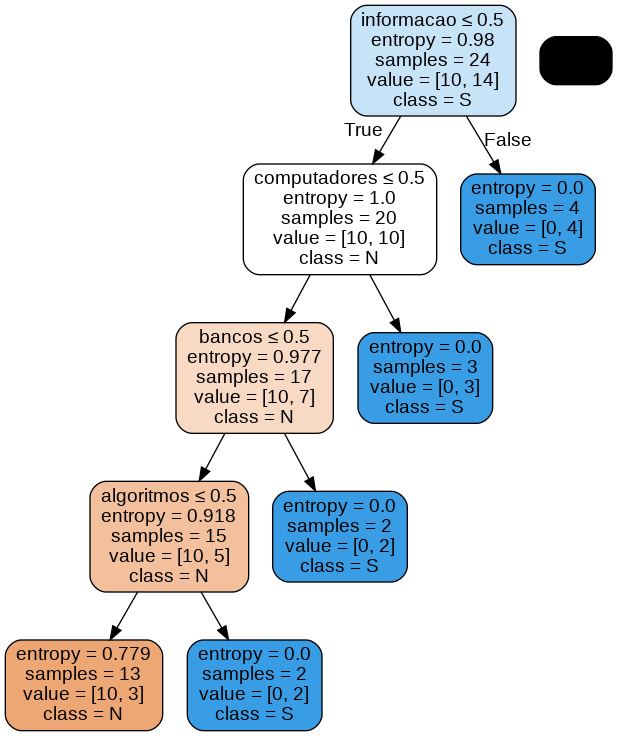

In [ ]:

from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = vectorizer.get_feature_names_out(),class_names=['N','S'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ArvoreDeDecisao.png')
Image(graph.create_png())

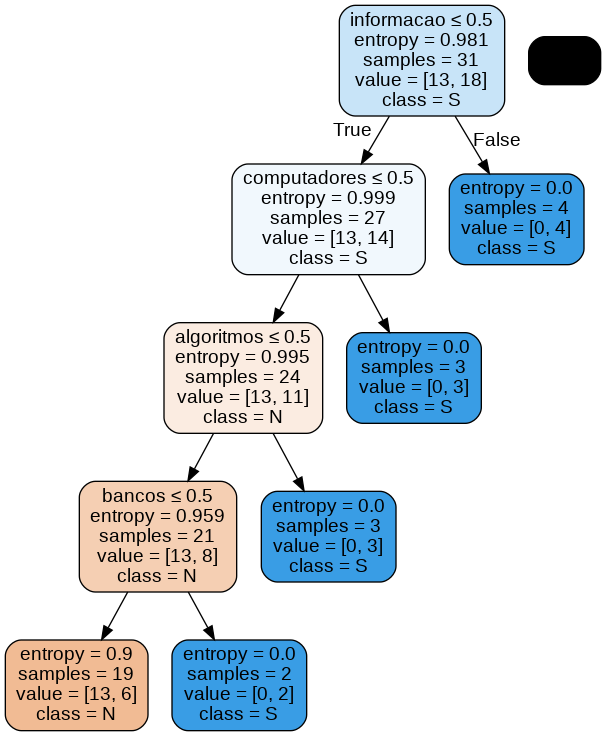

In [ ]:
# Produzindo um modelo com todo o conjunto de dados.
# O objetivo aqui não é produzir um classificador em si (para fazer predições),
# mas sim uma estrutura que represente/sumarize o conjunto de dados.
classifier2 = classifier.fit(processado,rotulos)

dot_data = StringIO()
export_graphviz(classifier2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = vectorizer.get_feature_names_out(),class_names=['N','S'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ArvoreDeDecisao2.png')
Image(graph.create_png())

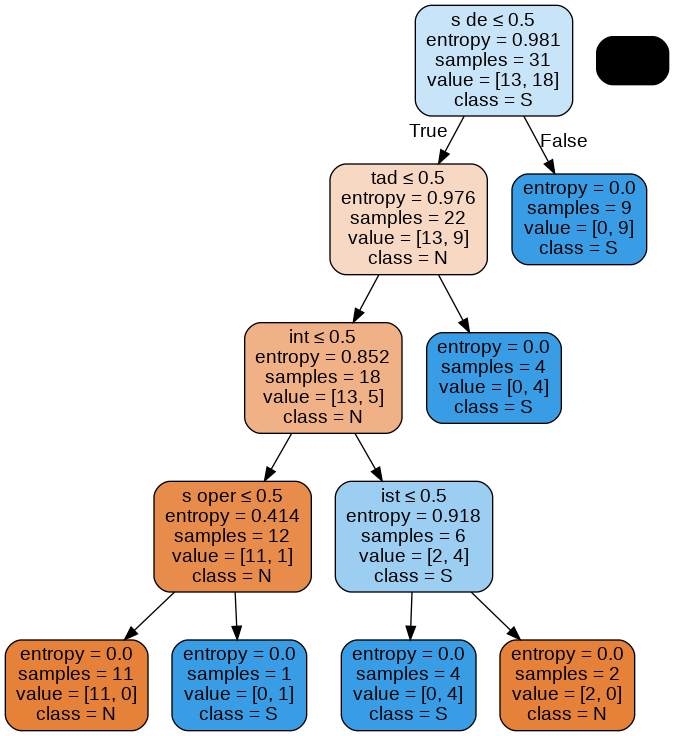

In [ ]:
# Produzindo um modelo com todo o conjunto de dados e usando n-gramas de caracters.
# O objetivo aqui não é produzir um classificador em si (para fazer predições),
# mas sim uma estrutura que represente/sumarize o conjunto de dados.

vectorizer = CountVectorizer(ngram_range=(3,7), strip_accents='ascii', lowercase=True, stop_words=minhaStopList, analyzer='char')
processado = vectorizer.fit_transform(texto)

classifier2 = classifier.fit(processado,rotulos)

dot_data = StringIO()
export_graphviz(classifier2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = vectorizer.get_feature_names_out(),class_names=['N','S'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ArvoreDeDecisao3.png')
Image(graph.create_png())

Este notebook foi baseado num notebook desenvolvido pela ex-aluna de SI Carla Vieira.